In [5]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



### One: Here We are seprating each skill into a seprate column and then we are counting and displaying the Skill based on a job title and plotting a specific job skill requirements

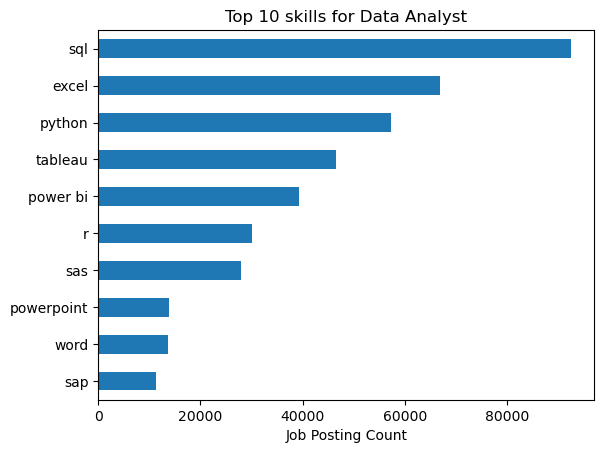

In [ ]:
df_exploded = df.explode('job_skills')
## This will break individual skill in a individual Row as we can see below


## Now we want to group them by job title, here we count the number of occurence of each skill for a specific job title
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
# skills_count = df_exploded.groupby('job_title_short')['job_skills'].size()

## Now this skills_count variable is saved as a series, we want it to convert to dataframe
df_skills_count = skills_count.reset_index(name='skill_count')


## Now we want to sort the dataframe by number of skills
df_skills_count = df_skills_count.sort_values(by = 'skill_count',ascending=False)

## Now we want to plot this for each Job title

job = 'Data Analyst'
top_skills = 10
df_skill_final = df_skills_count[df_skills_count['job_title_short']== job].head(top_skills)
# df_skill_final.plot(kind='bar', x='job_skills', y='skill_count')

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

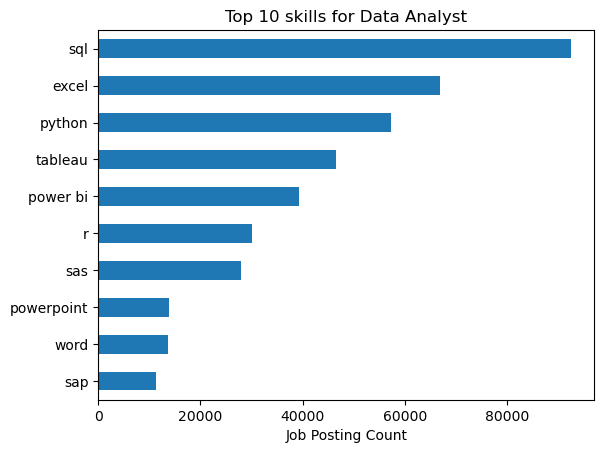

In [ ]:
df_exploded = df.explode('job_skills')                                          ## Seprating Skills into unique rows




skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()     ## Aggregating skills based on jobs


df_skills_count = skills_count.reset_index(name='skill_count')                  ## Conversion: Series > Dataframe



df_skills_count = df_skills_count.sort_values(by = 'skill_count',ascending=False) ## Sorting values



job = 'Data Analyst'                                                              ## Specifying job we want to see skills for
top_skills = 10                                                                   ## Num of skills we want to see
df_skill_final = df_skills_count[df_skills_count['job_title_short']== job].head(top_skills)


df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')                 ## Plotting graph
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

### Two: Converting Date time to String format


In [10]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df_modified  = df.copy()
df_modified['job_posted_date_str'] = df_modified['job_posted_date'].astype(str)
# df_modified.info()

print('This is being printed as a string->',df_modified['job_posted_date_str'][0])
print('This is being printed as a Date time object->',df['job_posted_date'][0])

This is being printed as a string-> 2023-06-16 13:44:15
This is being printed as a Date time object-> 2023-06-16 13:44:15
